In [ ]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import figure

In [3]:
df =pd.read_csv('/kaggle/input/heart-attack-prediction/heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


Each row in the dataset appears to represent an individual with various attributes related to heart health, and the last column "target" might indicate whether the person experienced a heart attack (1) or not (0). Here's a breakdown of the columns:
age: Age of the individual.
sex: Gender of the individual (1 for male, 0 for female).
cp: Chest pain type.
trestbps: Resting blood pressure.
chol: Serum cholesterol level.
fbs: Fasting blood sugar level.
restecg: Resting electrocardiographic results.
thalach: Maximum heart rate achieved.
exang: Exercise induced angina (1 for yes, 0 for no).
oldpeak: ST depression induced by exercise relative to rest.
slope: Slope of the peak exercise ST segment.
ca: Number of major vessels colored by fluoroscopy.
thal: Thalassemia.
target: Presence of heart attack (1 for yes, 0 for no).

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.536390
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.285822
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.260000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.710000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,0.810000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.900000


In [7]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.215906
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.276350
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.415776
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.135662
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.093788
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.037065
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.148220
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.399374
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.413340
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.396015


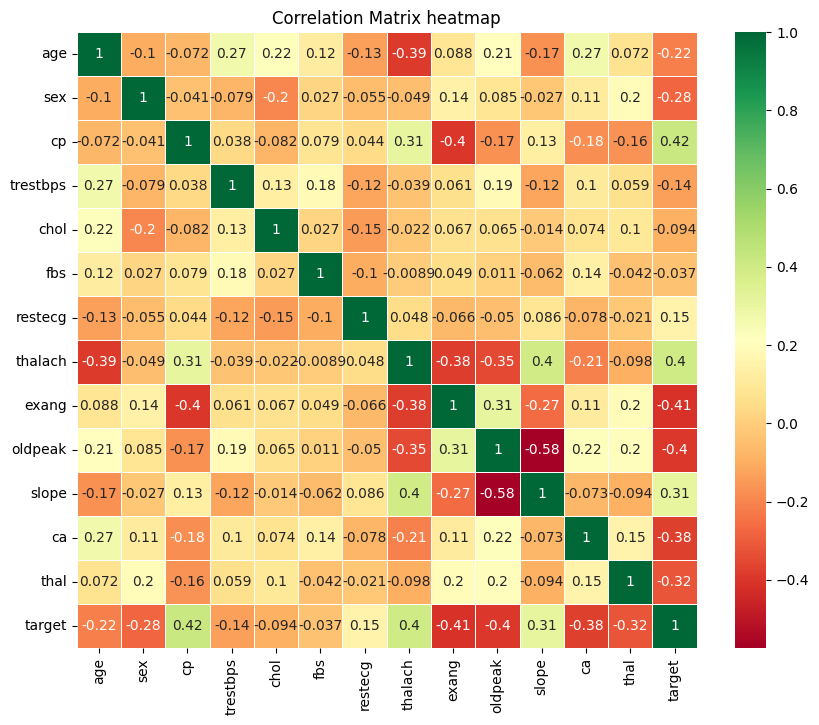

In [8]:
correlation_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", linewidths=.5)
plt.title('Correlation Matrix heatmap')
plt.show()

matrix represents the correlation coefficients between different features in the heart attack dataset. Each cell in the matrix contains the correlation coefficient between the corresponding row and column variables.

Here are some observations based on the correlation matrix:

Positive Correlations:

cp (Chest Pain Type) has a positive correlation with thalach (Maximum heart rate achieved) and slope.
thalach has a positive correlation with slope.
Negative Correlations:

age has a negative correlation with thalach.
sex has a negative correlation with target.
Strong Correlations:

The absolute correlation coefficient between cp and target is relatively high (0.42), indicating a moderate positive correlation.
The absolute correlation coefficient between thalach and target is also relatively high (0.40).
Other Observations:

exang (Exercise induced angina) has a strong negative correlation with thalach.
oldpeak (ST depression induced by exercise relative to rest) has a negative correlation with thalach.
Correlation coefficients range from -1 to 1, where:

1 indicates a perfect positive correlation,
-1 indicates a perfect negative correlation, and
0 indicates no correlation.

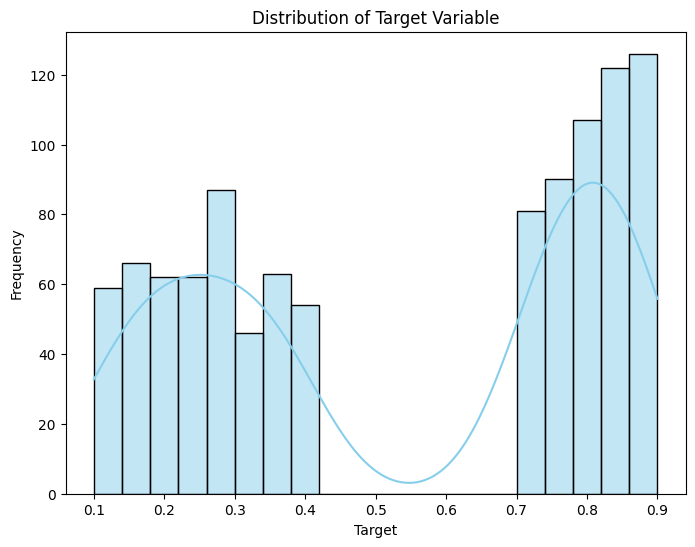

In [9]:

plt.figure(figsize=(8, 6))
sns.histplot(df['target'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()


In [10]:
median = df.median()
median

age          56.00
sex           1.00
cp            1.00
trestbps    130.00
chol        240.00
fbs           0.00
restecg       1.00
thalach     152.00
exang         0.00
oldpeak       0.80
slope         1.00
ca            0.00
thal          2.00
target        0.71
dtype: float64

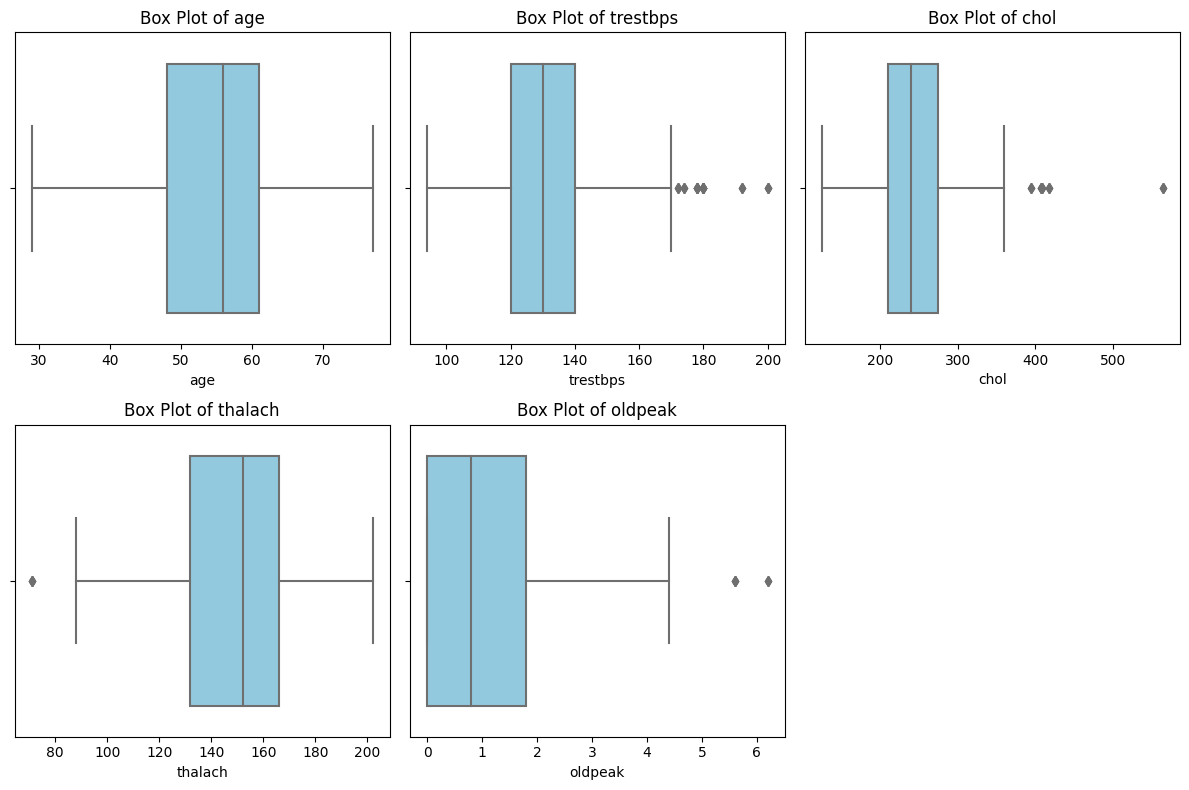

In [11]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create box plots for each numerical feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

The centre of distribution chol & oldpeak is positively skewed, because the whisker and half-box are longer on the right side of the median than on the left side.
Distribution of trestbps is approximately symmetric, because both half-boxes are almost the same length. It’s the most concentrated distribution because the interquartile range.
The centre of distribution thalach & age is negatively skewed because the whisker and half-box are longer on the left side of the median than on the right side.
                                                                                              

In [12]:
bins = [29, 45, 60, 100]
labels = ['Young', 'Middle-aged', 'Senior']
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


Create age categories such as 'Young', 'Middle-aged', and 'Senior' based on different age ranges.

In [13]:
df['total_risk'] = df['trestbps'] + df['chol']

Combine 'trestbps' (Resting Blood Pressure) and 'chol' (Serum Cholesterol) to create a new feature representing the total cardiovascular risk.

In [14]:
threshold_heart_rate = 150
df['exercise_angina'] = (df['exang'] == 1) & (df['thalach'] > threshold_heart_rate)

Combine 'exang' (Exercise induced angina) and 'thalach' (Maximum heart rate achieved) to create a binary indicator for exercise-induced angina when the heart rate is above a certain threshold.

In [15]:
df['cholesterol_hdl_ratio'] = df['chol'] / df['thalach']

Calculate the ratio of total cholesterol to high-density lipoprotein (HDL) as an additional cardiovascular risk factor.

In [16]:
df['target'] = df['target'].apply(lambda x: 1 if x >= 0.5 else 0)

Converting the target values into 1 and 0 for using in machine learning model

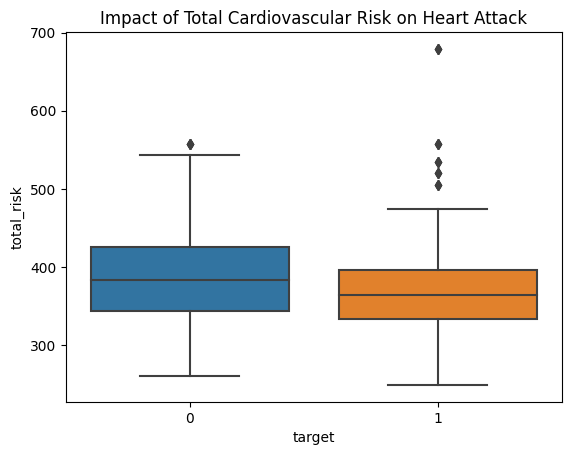

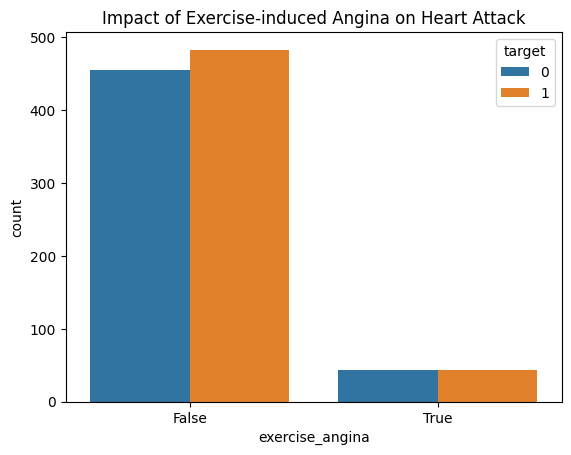

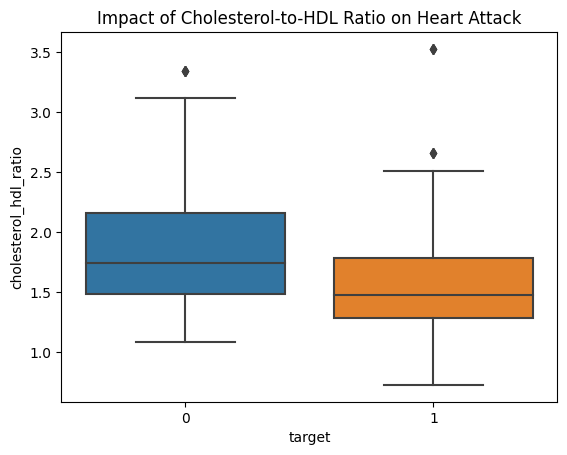

In [17]:

sns.boxplot(x='target', y='total_risk', data=df)
plt.title('Impact of Total Cardiovascular Risk on Heart Attack')
plt.show()

sns.countplot(x='exercise_angina', hue='target', data=df)
plt.title('Impact of Exercise-induced Angina on Heart Attack')
plt.show()

sns.boxplot(x='target', y='cholesterol_hdl_ratio', data=df)
plt.title('Impact of Cholesterol-to-HDL Ratio on Heart Attack')
plt.show()



In [18]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category,total_risk,exercise_angina,cholesterol_hdl_ratio
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Middle-aged,337,False,1.261905
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Middle-aged,343,True,1.309677
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Senior,319,False,1.392000
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Senior,351,False,1.260870
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Senior,432,False,2.773585
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,Middle-aged,348,False,2.032787
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,Middle-aged,432,False,2.271429
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0,Middle-aged,449,False,1.993103
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0,Middle-aged,369,False,1.729167
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0,Middle-aged,408,False,2.465517


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
X = df[['age', 'sex', 'chol', 'trestbps', 'thalach', 'exang', 'oldpeak']]
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but can be beneficial for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
Lr_model = LogisticRegression(random_state=42)

# Train the model on the training set
Lr_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = Lr_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Accuracy: 0.75

Confusion Matrix:
[[74 28]
 [23 80]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       102
           1       0.74      0.78      0.76       103

    accuracy                           0.75       205
   macro avg       0.75      0.75      0.75       205
weighted avg       0.75      0.75      0.75       205



Confusion Matrix:

True Positive (TP): 80 cases where the model correctly predicted positive outcomes.
True Negative (TN): 74 cases where the model correctly predicted negative outcomes.
False Positive (FP): 28 cases where the model incorrectly predicted positive outcomes.
False Negative (FN): 23 cases where the model incorrectly predicted negative outcomes.
Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. In your case, precision for class 0 is 0.76, and for class 1 is 0.74.

Recall (Sensitivity): Recall is the ratio of correctly predicted positive observations to all the observations in the actual class. In your case, recall for class 0 is 0.73, and for class 1 is 0.78.

F1-Score: The F1-score is the weighted average of precision and recall. It balances precision and recall. In your case, the weighted average F1-score is 0.75.

In [21]:

from sklearn.ensemble import RandomForestClassifier


# Features and target variable
X = df[['age', 'sex', 'chol', 'trestbps', 'thalach', 'exang', 'oldpeak']]
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier model
rfmodel = RandomForestClassifier(random_state=42)

# Train the model on the training set
rfmodel.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rfmodel.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Accuracy: 1.00

Confusion Matrix:
[[102   0]
 [  0 103]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



Accuracy: The model correctly predicted all instances in the test set, resulting in perfect accuracy.

Confusion Matrix:

True Positive (TP): 103 cases where the model correctly predicted positive outcomes.
True Negative (TN): 102 cases where the model correctly predicted negative outcomes.
False Positive (FP): 0 cases where the model incorrectly predicted positive outcomes.
False Negative (FN): 0 cases where the model incorrectly predicted negative outcomes.
Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. In your case, precision for both classes is 1.00, indicating that there were no false positives.

Recall (Sensitivity): Recall is the ratio of correctly predicted positive observations to all the observations in the actual class. In your case, recall for both classes is 1.00, indicating that there were no false negatives.

F1-Score: The F1-score is the weighted average of precision and recall. In your case, the weighted average F1-score is 1.00.

In [22]:

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}\n")
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy: 0.99

Confusion Matrix:
 [[102   0]
 [  3 100]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Accuracy: The model correctly predicted the class for approximately 99% of the instances in the test set.

Confusion Matrix:

True Positives (TP): 102 instances of class 0 and 100 instances of class 1 were correctly predicted.
False Positives (FP): 0 instances were wrongly predicted as class 0, and 3 instances were wrongly predicted as class 1.
True Negatives (TN): 102 instances were correctly predicted as class 0, and 100 instances were correctly predicted as class 1.
False Negatives (FN): 0 instances were wrongly predicted as class 0, and 3 instances were wrongly predicted as class 1.
Classification Report:

Precision: High precision indicates a low false positive rate. Precision is the ratio of correctly predicted positive observations to the total predicted positives.
Recall: High recall indicates a low false negative rate. Recall is the ratio of correctly predicted positive observations to the all observations in actual class.
F1-score: The harmonic mean of precision and recall. It balances precision and recall.

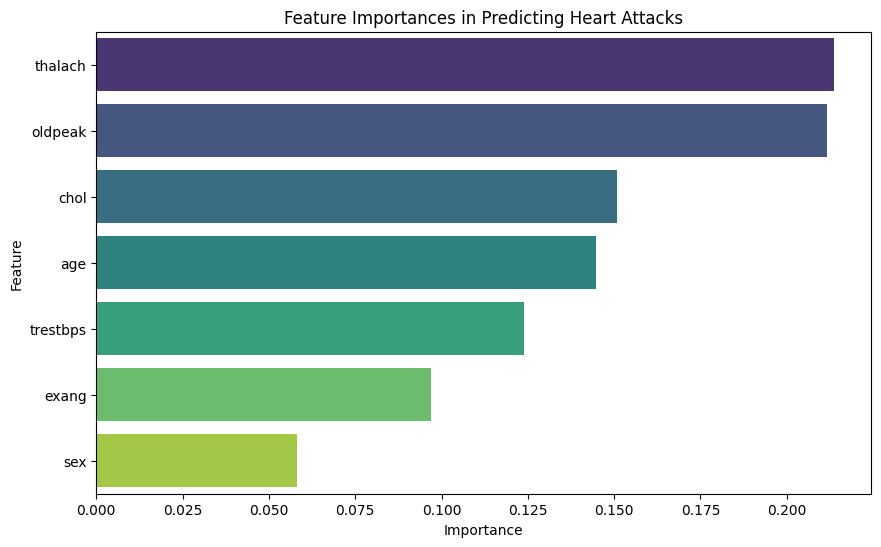

In [23]:

# Get feature importances
feature_importances = rfmodel.feature_importances_

# Get the names of the features
feature_names = X.columns  

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances in Predicting Heart Attacks')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


thalach (Maximum Heart Rate Achieved) has the highest importance.
oldpeak (ST depression induced by exercise relative to rest) is the second most important feature.
age and chol (Serum Cholesterol) also have significant importance.
Other features like trestbps (Resting Blood Pressure), exang (Exercise Induced Angina), and sex also contribute to the model's predictions.

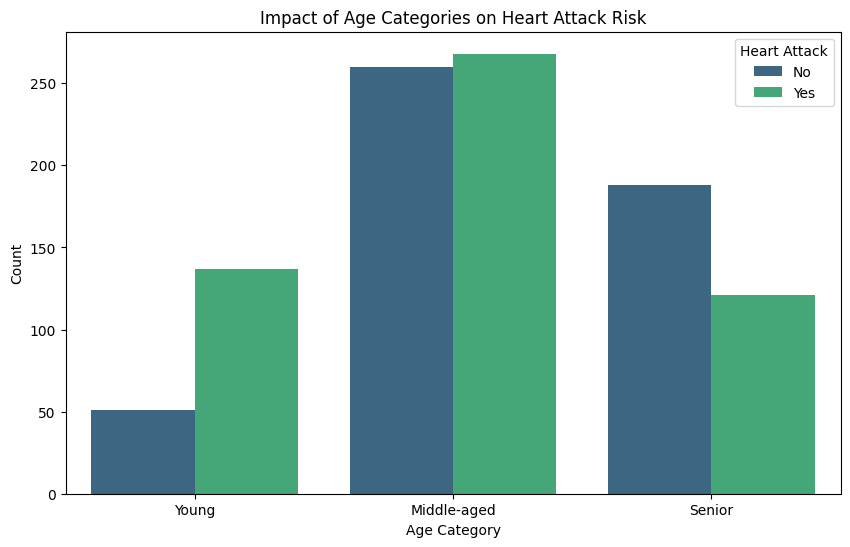

In [24]:


# Create a countplot to visualize the impact of age categories on heart attack risk
plt.figure(figsize=(10, 6))
sns.countplot(x='age_category', hue='target', data=df, palette='viridis')
plt.title('Impact of Age Categories on Heart Attack Risk')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Heart Attack', labels=['No', 'Yes'])
plt.show()


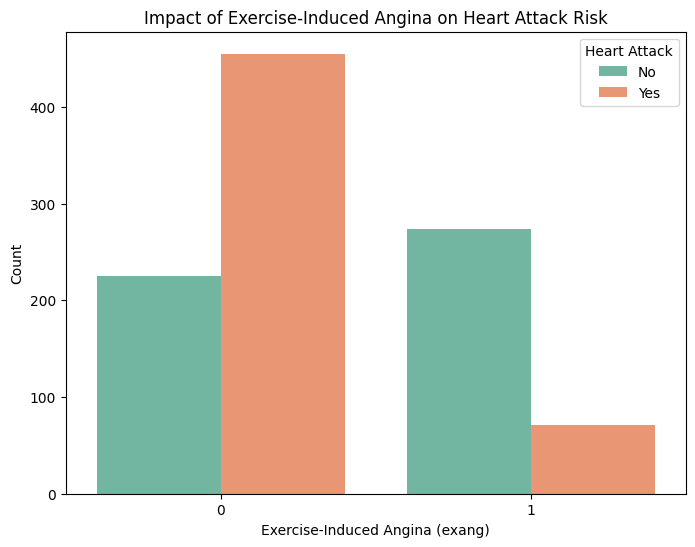

In [25]:

# Create a countplot to visualize the impact of exercise-induced angina on heart attack risk
plt.figure(figsize=(8, 6))
sns.countplot(x='exang', hue='target', data=df, palette='Set2')
plt.title('Impact of Exercise-Induced Angina on Heart Attack Risk')
plt.xlabel('Exercise-Induced Angina (exang)')
plt.ylabel('Count')
plt.legend(title='Heart Attack', labels=['No', 'Yes'])
plt.show()


The impact of exercise-induced angina on heart attack risk. This is captured by the 'exang' feature. Visualize the presence or absence of angina relates to the likelihood of a heart attack.


In [26]:
data = {
    'age': [45, 55, 65, 40, 50],
    'sex': [1, 0, 1, 0, 1],
    'chol': [240, 200, 220, 180, 210],
    'trestbps': [140, 120, 130, 110, 125],
    'thalach': [150, 160, 140, 170, 155],  
    'exang': [0, 1, 0, 0, 1], 
    'oldpeak': [1.5, 2.0, 1.0, 0.5, 2.5], 
    
}



df[['age', 'sex', 'chol', 'trestbps', 'thalach', 'exang', 'oldpeak']]




# Create a DataFrame
new_data = pd.DataFrame(data)

In [27]:
new_predictions = rfmodel.predict(new_data)

# Display the predictions
prediction_df = pd.DataFrame({'Prediction': new_predictions})

# Display the predictions with human-readable labels
prediction_df['Prediction_Label'] = prediction_df['Prediction'].apply(lambda x: 'Heart attack' if x == 1 else 'No heart attack')

# Print the updated predictions
print("New Predictions:")
print(prediction_df[['Prediction_Label']])

New Predictions:
  Prediction_Label
0     Heart attack
1  No heart attack
2  No heart attack
3     Heart attack
4  No heart attack


In [28]:
new_predictions = dt_model.predict(new_data)

# Display the predictions
prediction_df = pd.DataFrame({'Prediction': new_predictions})

# Display the predictions with human-readable labels
prediction_df['Prediction_Label'] = prediction_df['Prediction'].apply(lambda x: 'Heart attack' if x == 1 else 'No heart attack')

# Print the updated predictions
print("New Predictions:")
print(prediction_df[['Prediction_Label']])

New Predictions:
  Prediction_Label
0     Heart attack
1  No heart attack
2     Heart attack
3     Heart attack
4  No heart attack


In [29]:
new_predictions = Lr_model.predict(new_data)

# Display the predictions
prediction_df = pd.DataFrame({'Prediction': new_predictions})

# Display the predictions with human-readable labels
prediction_df['Prediction_Label'] = prediction_df['Prediction'].apply(lambda x: 'Heart attack' if x == 1 else 'No heart attack')

# Print the updated predictions
print("New Predictions:")
print(prediction_df[['Prediction_Label']])

New Predictions:
  Prediction_Label
0  No heart attack
1  No heart attack
2  No heart attack
3     Heart attack
4  No heart attack


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
